**Task 1: Data Preparation**

**Load and Preprocess the Data:**

Use the Python Imaging Library (PIL) to load images.

Convert images to grayscale, resize them to 28x28, and normalize pixel values to the range [0, 1].

Extract labels from folder names and convert them to one-hot encoded format.

In [34]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Function to load and preprocess data
def load_and_preprocess_data(data_dir, target_size=(28, 28)):
    images = []
    labels = []
    for label in range(10):  # Assuming 10 classes (digits 0-9)
        # Folder names are "digit_0", "digit_1", ..., "digit_9"
        folder_path = os.path.join(data_dir, f"digit_{label}")
        try:
            if not os.path.exists(folder_path):
                print(f"Warning: Folder {folder_path} does not exist. Skipping.")
                continue
            print(f"Processing folder: {folder_path}")
            print(f"Contents: {os.listdir(folder_path)}")

            for filename in os.listdir(folder_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')):
                    # Load image
                    img_path = os.path.join(folder_path, filename)
                    img = Image.open(img_path).convert('L')  # Convert to grayscale
                    img = img.resize(target_size)  # Resize to 28x28
                    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
                    images.append(img_array)
                    labels.append(label)
        except Exception as e:
            print(f"Error processing folder {folder_path}: {e}")
    return np.array(images), np.array(labels)


# Define dataset paths
test_dir = "/content/drive/MyDrive/AI&ML-Level6/Week 4/Devgnagari/DevanagariHandwrittenDigitDataset/Test"
train_dir = "/content/drive/MyDrive/AI&ML-Level6/Week 4/Devgnagari/DevanagariHandwrittenDigitDataset/Train"


# Load data
X_train, y_train = load_and_preprocess_data(train_dir)
X_test, y_test = load_and_preprocess_data(test_dir)

# Convert labels to one-hot encoded format
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Print shapes to verify
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train_one_hot.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test_one_hot.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train directory exists: True
Test directory exists: True
Processing folder: /content/drive/MyDrive/AI&ML-Level6/Week 4/Devgnagari/DevanagariHandwrittenDigitDataset/Train/digit_0
Contents: ['39600.png', '39598.png', '43516.png', '43511.png', '43493.png', '43497.png', '43522.png', '43513.png', '43503.png', '43509.png', '43520.png', '43504.png', '43502.png', '43514.png', '43495.png', '43498.png', '43524.png', '43491.png', '43510.png', '43515.png', '43523.png', '43500.png', '43492.png', '43499.png', '43521.png', '43496.png', '43518.png', '39603.png', '43528.png', '4558.png', '4567.png', '43525.png', '44564.png', '4564.png', '4561.png', '4570.png', '44561.png', '4559.png', '43526.png', '4571.png', '4572.png', '44563.png', '44562.png', '44565.png', '4568.png', '4566.png', '4575.png', '4562.png', '43529.png', '4569.png', '4560.png', '44567.png', '4573.png', '43527.p

**Task 2:**

Build the FCN Model

**1. Create a Sequential Model:**

Add 3 hidden layers with 64, 128, and 256 neurons, respectively.

Use sigmoid activation for hidden layers.

Add an output layer with 10 neurons and softmax activation.

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the FCN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784-dimensional vectors
    Dense(64, activation='sigmoid'),  # 1st hidden layer
    Dense(128, activation='sigmoid'), # 2nd hidden layer
    Dense(256, activation='sigmoid'), # 3rd hidden layer
    Dense(10, activation='softmax')   # Output layer for 10 classes
])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

**Task 3: Compile the Model**

Model Compilation
• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [38]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot labels
    metrics=['accuracy']
)

**Task 4: Train the Model**

**Model Training**

Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.
• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.
• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

Epoch 1/20
105/107 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7867 - loss: 0.6436

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7878 - loss: 0.6401 - val_accuracy: 0.0000e+00 - val_loss: 11.5091
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9063 - loss: 0.3081 - val_accuracy: 0.0000e+00 - val_loss: 12.1381
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9429 - loss: 0.1977 - val_accuracy: 0.0000e+00 - val_loss: 12.7561
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9525 - loss: 0.1566 - val_accuracy: 0.0000e+00 - val_loss: 13.2271
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9632 - loss: 0.1294 - val_accuracy: 0.0000e+00 - val_loss: 13.6499
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9709 - loss: 0.0995 - val_accuracy: 0.0000e+00 - val_loss: 13.8519


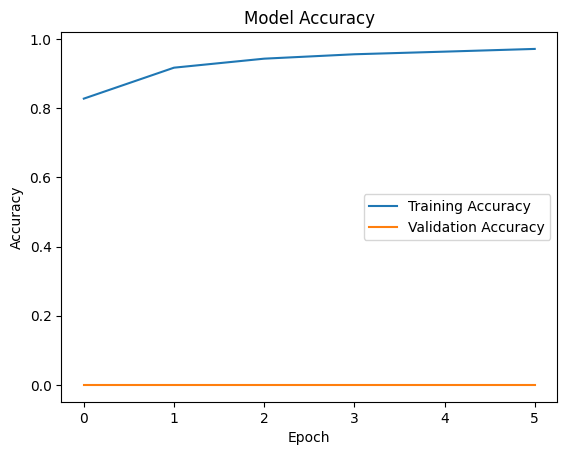

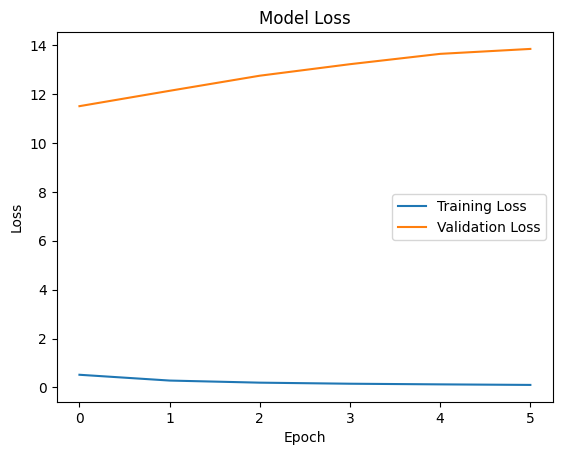

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Task 5: Evaluate the Model**

Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.


In [40]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8991 - loss: 0.5810
Test Loss: 2.5168
Test Accuracy: 0.7397


**Task 6: Save and Load the Model**

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [41]:
# Save the trained model
model.save('devnagari_fcn_model.h5')
print("Model saved to 'devnagari_fcn_model.h5'")

# Load the saved model
loaded_model = tf.keras.models.load_model('devnagari_fcn_model.h5')
print("Model loaded from 'devnagari_fcn_model.h5'")

# Re-evaluate the loaded model
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(X_test, y_test_one_hot)
print(f"Loaded Model Test Loss: {loaded_test_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}")

Model saved to 'devnagari_fcn_model.h5'
Model loaded from 'devnagari_fcn_model.h5'
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8991 - loss: 0.5810
Loaded Model Test Loss: 2.5168
Loaded Model Test Accuracy: 0.7397


**Task 7: Predictions**

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

In [42]:
# Make predictions on test data
predictions = loaded_model.predict(X_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare with true labels (first 5 examples)
for i in range(5):
    print(f"Test Image {i+1}: Predicted Label = {predicted_labels[i]}, True Label = {y_test[i]}")

# Calculate accuracy manually for verification
manual_accuracy = np.mean(predicted_labels == y_test)
print(f"Manual Test Accuracy: {manual_accuracy:.4f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Image 1: Predicted Label = 0, True Label = 0
Test Image 2: Predicted Label = 0, True Label = 0
Test Image 3: Predicted Label = 0, True Label = 0
Test Image 4: Predicted Label = 0, True Label = 0
Test Image 5: Predicted Label = 0, True Label = 0
Manual Test Accuracy: 0.7397
